# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and loaded them in the notebook. 


**Note:** the methods required to gather each data are different and clearly stated.


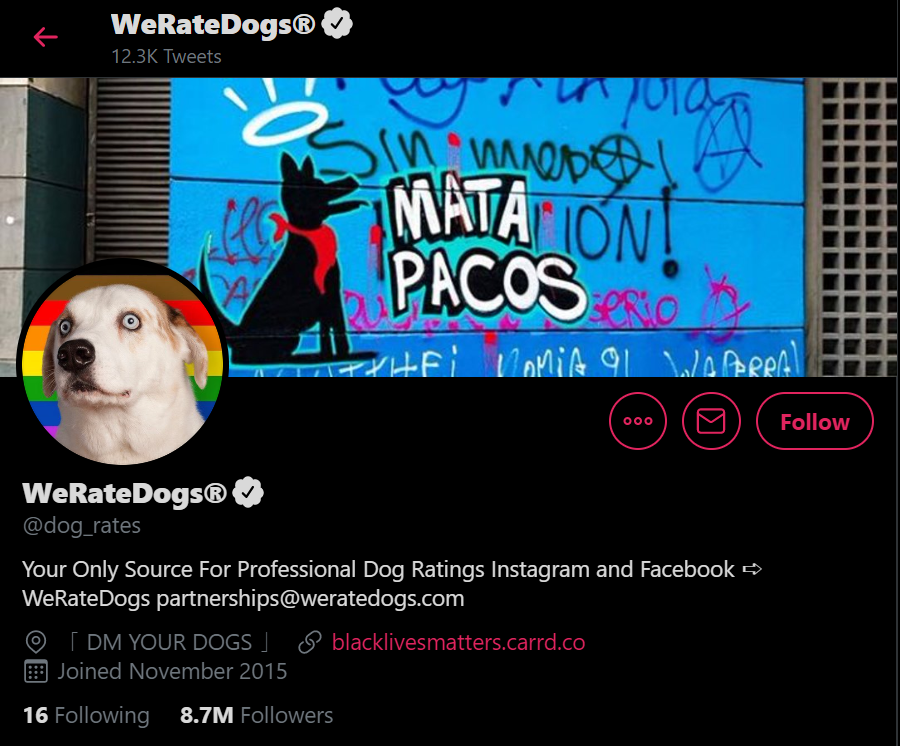

First start by importing the necessary libraries and packages needed for operation

In [2]:
#Importing os to download the content on our physical storage

import os

#Importing pandas and numpy to analyze and store data in dataframe

import pandas as pd

import numpy as np

In [3]:
#Importing for visualizations

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline



In [4]:
#Importing other packages

import tweepy

import requests

import json

import time

import math

import re

import datetime

import sklearn

import io

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
# Gathering and downloading the WeRateDogs Twitter archive data 

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv", dtype = {"tweet_id": str})

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Downloaded programmatically using the Requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [7]:
# Opening a tsv file for image predict and saving the response content

with open('image-predictions.tsv', mode = 'wb') as file:
    
    file.write(response.content)

In [8]:
# Reading the tsv file 

image_predict = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [15]:
# I am going to use Tweepy python library to connect to Twitter API.

import tweepy

consumer_key = "Happy"

consumer_secret = "Happy"

access_token = "Happy"

access_secret = "happy"

auth = tweepy.oAuthHandler (consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)



In [25]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [17]:
# Query twitter's API for the Json data of each tweet Id in the twitter archive

index = 0

# Dictionary to catch the errors if there is any during the course of gathering

error_dictionary = {}

start = time.time()



In [19]:
# For error handling

with open('getstatus_error.txt', 'w') as errorfile:
    
    correct_ids = 0
    
    error_ids = 0
    
    tweet_ids = twitter_archive.tweet_id

In [11]:
# Saving each tweet's returned JSON as a new line in a .txt file


with open ('tweet-json.txt', 'w', encoding = 'utf-8') as buka_file:
    
    for i, tweet_id in tweet_ids.iteritems():
        
        try:
            
            print("%s# %s" % (str(i + 1), tweet_id))
            
            # Getting tweet data using twitter API
            
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            
            json_content = tweet._json
            
            # Writing each tweet's JSON data to its own line in a file
            
            json.dump(json_content, outfile)
            
            outfile.write('\n')
            
            correct_ids += 1
            
        except tweepy.TweepError as e:
            
            error_ids +=1
            
            error_str = []
            
            error_str.append(str(tweet_id))
            
            error_str.append(': ')
            
            error_str.append(e.response.json()['errors'][0]['message'])
            
            error_str.append('\n')
            
            errfile.write(''.join(error_str))
            
            print(''.join(error_str))
            
            continue
            
    print("%s %s" % ('correct tweets:', correct_ids))
    
    print("%s %s" % ('Error tweets:', error_ids))
    

# To end the timer    
    
end = time.time()    
    
print((end - start)/(1000 * 60))    

In [16]:
# Extracting the missing columns from enhanced twitter archive

# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame

df_list = []

# Opening text file for reading 

with open('tweet-json.txt', 'r') as json_file:
    
    for line in json_file.readlines():
        
        # Reading each JSON string status into a dictionary and reading each line as a dictionary
        
        status = json.loads(line)
        
        # Getting the required parameters
        
        tweet_id = status['id']
        
        rt_count = status['retweet_count']
        
        fav_count = status['favorite_count']
        
        follow_count = status['user']['followers_count']
        
        frnds_count = status['user']['friends_count']
        
        # Append to list of dictionaries
        
        df_list.append({'id': tweet_id,
                        'retweet_count': rt_count,
                        'favorite_count': fav_count,
                        'followers_count': follow_count,
                        'friends_count': frnds_count
                       })
        
        

# Create a DataFrame with tweet ID, retweet count, favorite count, followers count and friends count

tweet_json = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])


## Assessing Data
In this section, I detected and documented at least **eight (8) quality issues and two (2) tidiness issue**. I use **both** visual assessment and programmatic assessement to assess the data.

**Note:** paid attention to the following key points when accessing the data:

1) Only the original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

2) Assessing and cleaning the entire dataset completely required a lot of time. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset to save time and energy.

3) The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

4) No need to gather the tweets beyond August 1st, 2017.



In [12]:
# Displaying the first five records for twitter archive

twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The twitter_archive dataset contains the following paraemters:

1) tweet_id: the unique identifier for each tweet

2) in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

3) in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

4) timestamp: time when this Tweet was created

5) source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

6) text: actual UTF-8 text of the status update

7) retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

8) retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

9) retweeted_status_timestamp: time of retweet

10) expanded_urls: tweet URL

11) rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

12) rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

13) name: name of the dog

14) doggo: one of the 4 dog "stage"

15) floofer: one of the 4 dog "stage"

16) pupper: one of the 4 dog "stage"

17) puppo: one of the 4 dog "stage"

In [28]:
# Getting the first five records for image prediction

image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Image prediction dataset contains the follwoing parameters:

1) tweet_id: the unique identifier for each tweet

2) jpg_url: dog's image URL

3) img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

4) p1: algorithm's #1 prediction for the image in the tweet

5) p1_conf: how confident the algorithm is in its #1 prediction

6) p1_dog: whether or not the #1 prediction is a breed of dog

7) p2: algorithm's #2 prediction for the image in the tweet

8) p2_conf: how confident the algorithm is in its #2 prediction

9) p2_dog: whether or not the #2 prediction is a breed of dog

10) p3: algorithm's #3 prediction for the image in the tweet

11) p3_conf: how confident the algorithm is in its #3 prediction

12) p3_dog: whether or not the #3 prediction is a breed of dog

In [45]:
# Getting the first five records for the additional data from twitter APIs

tweet_json.head(5)

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


Tweet_json dataset contains the following: 

1) id: the unique identifier for each tweet

2) retweet_count: number of times this Tweet has been retweeted

3) favorite_count: indicates approximately how many times this Tweet has been liked by Twitter users

4) followers_count: the user number of followers

5) friends_count: the user number of friends


In [10]:
# Getting the first five records for the dataset

twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
# Getting the last five records for the dataset

twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [46]:
# Getting the concise summary of the twitter_archive dataset

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [13]:
# Checking the size of the dataset

twitter_archive.shape

(2356, 17)

In [14]:
# Checking the data types of the dataset

twitter_archive.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
# Getting the useful descriptive statistics of the dataset

twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [52]:
# Getting 5 random sample between expanded urls and source for the twitter archive dataset

twitter_archive[['source', 'expanded_urls']].sample(5)

,source,expanded_urls
2126,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/670338931...
379,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/827653905...
1312,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/707014260...
1391,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/700143752...
1100,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/735648611...


In [54]:
# Comparing the unique content between source and expanded urls

twitter_archive.source.unique(), twitter_archive.expanded_urls.unique()

(array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
        '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object),
 array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
        'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
        'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
        ...,
        'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
        'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
        'https://twitter.com/dog_rates/status/666020888022790149/photo/1'], dtype=object))

In [18]:
# Getting a list of columns with missing values 

twitter_archive.columns[twitter_archive.isnull().any()].tolist()

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls']

In [21]:
# Checking for duplicated values

twitter_archive.duplicated().any()

False

In [22]:
# checking the rating denominator values

twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [23]:
# Checking the rating by numerator values

twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [26]:
# Sorting the names in alphabetic order

twitter_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [31]:
# Checking if there are any records in twitter_archive which are retweets

len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [32]:
# Checking if there are any records in twitter_archive whose corresponding record with same tweet_id is missing in image predict table


len(twitter_archive[~twitter_archive.tweet_id.isin(image_predict.tweet_id)])

2356

In [63]:
# Checking five random samples of the dog 

twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,doggo,floofer,pupper,puppo
1539,None,None,None,None
451,None,None,None,None
406,None,None,None,None
483,None,None,pupper,None
1512,None,None,None,None


In [64]:
# Checking the unique value for all the dogs in the dataset

twitter_archive.doggo.unique(), twitter_archive.floofer.unique(), twitter_archive.pupper.unique(), twitter_archive.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [158]:
# Getting value count for doggo

twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [159]:
# Getting value count for floofer

twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [160]:
# Getting value count for pupper

twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [161]:
# Getting value count for puppo

twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
# Getting the first five records for the image prediction dataset

image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
# Getting the last five records for the image prediction dataset

image_predict.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
# Getting the concise summary of the image_predict dataset

image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# Checking the size of the dataset

image_predict.shape

(2075, 12)

In [29]:
# Checking the data types of the dataset

image_predict.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [30]:
# Getting the useful descriptive statistics of the dataset

image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
# Getting a list of columns with missing values 

image_predict.columns[image_predict.isnull().any()]

Index([], dtype='object')

In [11]:
# Checking for duplicated values

image_predict.duplicated().any()

False

In [17]:
# Getting the first five records for the tweet json dataset

tweet_json.head(5)

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


In [18]:
# Getting the last five records for the tweet json dataset

tweet_json.tail(5)

,id,retweet_count,favorite_count,followers_count,friends_count
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104
2353,666020888022790149,532,2535,3201018,104


In [19]:
# Getting the concise summary of the tweet json dataset

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [20]:
# Checking the size of the dataset

tweet_json.shape

(2354, 5)

In [21]:
# Checking the data types of the dataset

tweet_json.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
followers_count    int64
friends_count      int64
dtype: object

In [22]:
# Getting the useful descriptive statistics of the dataset

tweet_json.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [25]:
# Getting a list of columns with missing values 

tweet_json.columns[tweet_json.isnull().any()]

Index([], dtype='object')

In [24]:
# Checking for duplicated values

tweet_json.duplicated().any()

False

In [73]:
# Getting the unique values for the retweet count, favorite count, followers count and friends count

tweet_json['favorite_count'].unique(), tweet_json['retweet_count'].unique(), tweet_json['followers_count'].unique(), tweet_json['friends_count'].unique()

(array([39467, 33819, 25461, ...,   128,   132,  2535]),
 array([8853, 6514, 4328, ...,  879,   41,  147]),
 array([3200889, 3200890, 3200891, 3200892, 3200799, 3200800, 3200893,
        3200894, 3200802, 3200895, 3200896, 3200897, 3200898, 3200899,
        3200900, 3200901, 3200809, 3200902, 3200810, 3200903, 3200904,
        3200905, 3200906, 3200907, 3200908, 3200816, 3200942, 3200943,
        3200851, 3200944, 3200945, 3200946, 3200947, 3200948, 3200949,
        3200950, 3200858, 3200951, 3200859, 3200952, 3200860, 3200953,
        3200954, 3200862, 3201000, 3201001, 3201002, 3200910, 3201003,
        3201004, 3201005, 3200913, 3201006, 3201007, 3201008, 3201009,
        3201010, 3200918, 3201011, 3201012, 3201013, 3201014, 3201015,
        3201016, 3201017, 3201018]),
 array([104]))

The three dataset have been gathered and were properly assessed. With the assessment, I looked for quality and tidiness issues.


**Quality** : Low-quality data is commonly referred to as dirty data. Dirty data has issues with its content. The Data Quality Dimensions are Completeness, Validity, Accuracy, and Consistency.


**Tidiness** : Untidy data is commonly referred to as “messy” data. Messy data has issues with its structure. Tidy data is where:

1. Each variable forms a column.

2. Each observation forms a row.

3. Each type of observational unit forms a table.

After visually assessing the data in DataFrames and in excel spreadsheets, and programmatically assessing the three DataFrames individually, I found 8 quality issues and 2 tidiness issues in all, and all were documented in my jupyter notebook.

### Quality issues

1. Null values


2. columns which holds no data as: 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.


3. Duplicated columns as expanded_url and source are the same content 


4. Timestamp datatype to be in datetime data type


5. Columns doggo, floofer, pupper, puppo values are not in true/false format


6. Unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>. Convert into these values iPhone, Twitter, Vine, TweetDeck.


7. The following feature img_num not neccessary in the image prediction dataset


8. Rating_denominator column has values other than 10 and Rating_numerator column has values less than or equal to 10 as well as some very large numbers 




### Tidiness issues


1. There are too many datasets and their overall structure is untidy


2. doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"

## Cleaning Data


In this section, we cleaned **all** of the issues documented while assessing. 

**Note:** A copy of the original data was made before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).


The result is of high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [187]:
# Making copies of original pieces of data

# Making a copy for twitter archive

arch_cln = twitter_archive.copy()
    
    

In [31]:
# Making a copy for image prediction

image_cln = image_predict.copy()

In [115]:
# Making a copy for tweet json

twit_cln = tweet_json.copy()

### Issue #1:

#### Define:

Unifying the Null value to be NaN 

#### Code

In [188]:
# replacing the null value to be NaN

arch_cln.replace('None', np.nan, inplace = True)



#### Test

In [189]:
arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(2), object(1

### Issue #2:

#### Define

Remove columns which holds no data or low amount of data like  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code

In [190]:
# Dropping the unwanted columns

arch_cln.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [191]:
arch_cln.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN


### Issue #3:



#### Define:

Dropping the duplicated column which is expanded_url 



#### Code



In [192]:
arch_cln.drop(columns=['expanded_urls'], inplace = True)



#### Test

In [195]:
arch_cln.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #4:



#### Define:

Converting timestamp to be datetime and renaming the column to tweet_date 


#### Code


In [197]:
arch_cln.timestamp = pd.to_datetime(arch_cln['timestamp'])

In [198]:
arch_cln.rename(columns={'timestamp': 'tweet_date'}, inplace = True)



#### Test

In [199]:
arch_cln.dtypes

tweet_id                      object
tweet_date            datetime64[ns]
source                        object
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #5:



#### Define:


Converting the columns doggo, floofer, pupper, puppo values into true/false for easy analysis




#### Code


In [200]:
arch_cln.puppo.replace(np.nan, False, inplace=True)

arch_cln.pupper.replace(np.nan, False, inplace=True)

arch_cln.floofer.replace(np.nan, False, inplace=True)

arch_cln.doggo.replace(np.nan, False, inplace=True)

In [201]:
arch_cln.puppo.replace('puppo', True, inplace=True)

arch_cln.pupper.replace('pupper', True, inplace=True)

arch_cln.floofer.replace('floofer', True, inplace=True)

arch_cln.doggo.replace('doggo', True, inplace=True)



#### Test

In [202]:
arch_cln.sample(5)

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
106,871879754684805121,2017-06-06 00:01:46,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,13,10,Lassie,False,False,False,False
32,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,12,10,NaN,False,False,False,False
2199,668779399630725120,2015-11-23 13:13:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,10,10,Kevon,False,False,False,False
886,759943073749200896,2016-08-01 02:45:22,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,12,10,NaN,False,False,True,False
1805,676942428000112642,2015-12-16 01:50:26,"<a href=""http://twitter.com/download/iphone"" r...",Who leaves the last cupcake just sitting there...,9,10,NaN,False,False,False,False


### Issue #6:



#### Define:

Renaming values to iPhone, Twitter, Vine, TweetDeck and storing it under source




#### Code



In [203]:
arch_cln.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)

arch_cln.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)

arch_cln.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)

arch_cln.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)




#### Test

In [204]:
arch_cln.source.value_counts()

iPhone       2221
Vine           91
Twitter        33
Tweetdeck      11
Name: source, dtype: int64

### Issue #7:



#### Define:

Dropping img_num column 



#### Code



In [206]:
image_cln.drop(columns = ['img_num'], inplace = True)



#### Test

In [93]:
image_cln.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #8:



#### Define:


For the records whose rating denominator is greater than 10 and divisible by 10, we used the quotient as the divisor to divide the rating numerator. If the numerator turns out to be divisible, we assigned this quotient as the rating numerator.

For the remaining records, we checked if the text column contains any fraction whose denominator is 10. We ensured if it does, we updated the rating denominator to 10. Additionally, we updated the rating numerator with the numerator value of this fraction.

Also

For all those records whose rating numerator is either less than or equal to 10 or greater than 10 but has a very high value, we checked if the text contains any fraction whose denominator is 10. If it does, we updated the rating numerator with the numerator value of this fraction.




#### Code



In [207]:
# Regex to match fractions


pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# Function which will match the above pattern and return an array of fractions, if any


def savi (y):
  

    return [m.group(1) for m in re.finditer(pattern, y)]

In [208]:
# Iterating through all those records whose rating_denominator is not 10


for i, row in arch_cln[arch_cln.rating_denominator != 10].iterrows():
    
    d = row.rating_denominator
    
    # If rating_denominator is greater than 10 and divisible by 10
    
    if d > 10 and d%10 == 0:
       
        # Assign divisor as the quotient
        
        divisor = d/10
        
        n = row.rating_numerator
        
        # If rating_numerator is greater than 10 and divisible by the divisor
        
        if n%divisor == 0:
        
            # Reassigning rating_denominator as 10
            
            arch_cln.set_value(i, 'rating_denominator', 10)
            
            # Reassigning rating_numerator as the quotient of rating_numerator by divisor
            
            arch_cln.set_value(i, 'rating_numerator', int(n/divisor))
    
    # For all those records whose rating_denominator is either less than 10 or not divisible by 10
    
    else:
    
        # Extract all fractions(ratings) from text using savi function
        
        ratings = savi(row.text)
        
        # Iterate through all the fractions
        
        for rating in ratings:
            
            # If denominator of any such fraction is equal to 10
            
            if rating.split('/')[1] == '10':
                
                # Reassigning rating_denominator as 10
                
                arch_cln.set_value(i, 'rating_denominator', 10)
                
                # Reassigning rating_numerator as the numerator value of this fraction
                
                arch_cln.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [209]:
arch_cln[(arch_cln.rating_numerator <= 10) | (arch_cln.rating_numerator > 14)].rating_numerator.value_counts().sort_index()


0         2
1         8
2        11
3        19
4        15
5        37
6        32
7        54
8       102
9       158
10      464
15        2
17        1
20        1
24        1
26        1
27        1
75        2
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [210]:
# For rows whose rating numerator is either less than or equal to 10 or greater than 10 but has a very high value 

for i, row in arch_cln[(arch_cln.rating_numerator <= 10) | (arch_cln.rating_numerator > 14)].iterrows():
    
    ratings = savi(row.text)
    
    for rating in ratings: 
        
        if rating.split('/')[1] == '10':
        
            n = int(round(float(rating.split('/')[0])))
            
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                
                arch_cln.set_value(i, 'rating_numerator', n)
                
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app




#### Test

In [211]:
arch_cln.rating_denominator.value_counts()

10    2353
15       1
7        1
16       1
Name: rating_denominator, dtype: int64

In [212]:
arch_cln[(arch_cln.rating_numerator <= 10) | (arch_cln.rating_numerator > 14)].rating_numerator.value_counts().sort_index()


0         2
1         8
2        10
3        19
4        14
5        34
6        32
7        54
8       100
9       158
10      465
15        2
17        1
20        1
24        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

# Tidiness

### Issue #1:



#### Define:

1) Remove rows

2) Merge arch_cln and twit_cln into arch_cln.

2) Leave imagine_cln as a separate dataset.


#### Code



In [213]:
# Identify tweet_ids in arc_cln but not in twit_cln


not_shared = (~arch_cln.tweet_id.isin(list(twit_cln.tweet_id)))

not_shared.sum()


2356

In [163]:
# Remove these tweets

arc_cln = arc_cln[~not_shared]

In [214]:
# Merge arc_cln and twit_cln into arc_cln

arch_cln = pd.merge(left= arch_cln, right= twit_cln, how='left', on='tweet_id')



#### Test

In [216]:
arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null object
tweet_date            2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
retweet_count         0 non-null float64
favorite_count        0 non-null float64
followers_count       0 non-null float64
friends_count         0 non-null float64
dtypes: bool(4), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 230.1+ KB


In [217]:
image_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


In [218]:
twit_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(4), object(1)
memory usage: 92.0+ KB


### Issue #2:



#### Define:


Merging doggo, floofer, pupper and puppo columns to a stage column. Converting the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk.

Dropping doggo, floofer, pupper and puppo columns.


#### Code



In [219]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
arch_cln['stage'] = arch_cln[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)


In [220]:
# convert the datatype from string to categorical
arch_cln.stage = arch_cln.stage.astype('category')




#### Test

In [221]:
arch_cln.stage.value_counts()


False    1976
True      380
Name: stage, dtype: int64

In [222]:
arch_cln.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2356 non-null object
tweet_date            2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
retweet_count         0 non-null float64
favorite_count        0 non-null float64
followers_count       0 non-null float64
friends_count         0 non-null float64
stage                 2356 non-null category
dtypes: bool(4), category(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 232.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [261]:
arch_cln.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

image_cln.to_csv('image_prediction_master.csv', encoding='utf-8', index=False)


In [262]:
# We save our data in a pickle format not to lose pandas types definitions in a text csv file.

arch_cln.to_pickle("./twitter_archive_master.csv.pkl")


image_cln.to_pickle("./image_prediction_master.csv.pkl")

## Analyzing and Visualizing Data



As a result of data wrangling there are two clean datasets forming an analitical view:

arch_cln,


image_cln.

In [263]:
# Reading the clean data

df_arc = pd.read_csv('twitter_archive_master.csv')

In [264]:
df_img = pd.read_csv('image_prediction_master.csv')

In [227]:
df_arc.head(5)

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count,friends_count,stage
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,False,False,False,NaN,NaN,NaN,NaN,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,False,False,False,False,NaN,NaN,NaN,NaN,False
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,False,False,False,False,NaN,NaN,NaN,NaN,False
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,False,False,False,False,NaN,NaN,NaN,NaN,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,False,False,False,False,NaN,NaN,NaN,NaN,False


In [228]:
df_img.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Insights:


1. Most common 10 dogs' names?

2. What can we say about dogs' ratings?

3. What can we say about retweets and favorities accounts comparing to original tweets creation?

## Most common 10 dogs' names

In [231]:
top_names = df_arc.name.value_counts().nlargest(13)

top_names



a          55
Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
the         8
an          7
Name: name, dtype: int64

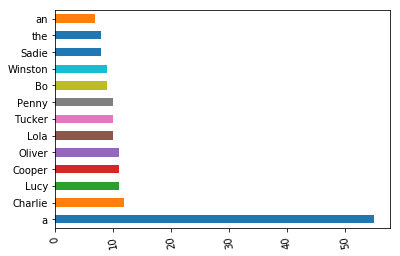

In [236]:
top_names.plot(kind='barh')

plt.xticks(rotation=100)

plt.show()

Answer: 

If we exclude cases, where a letter 'a' and an article 'the' are provided, the most popular names are: lucy, charlie, cooper, oliver, tucker, penny, winston, lola, sadie and daisy.




## Dogs' rating

In [238]:
df_arc.rating_numerator.describe()

count    2356.000000
mean       12.181664
std        40.779102
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [239]:
# How many % of ratings are above 1.5 (150%)?

len(df_arc[df_arc.rating_numerator > 1.5]) / len(df_arc.rating_numerator) * 100

99.57555178268251

Answer: 

There are 2356 dogs' ratings in the dataset. The worst rate is 0, the best is 1776. The ratings are not normally distributed, their distribution is right-skewed (long-tailed). Most of the ratings are below 150%, only 8 of them are above 150%. With Atticus being the most rated of all. 75% of ratings are 120% or below and only 25% or less are below 100%. Most dogs are very well rated, with the mean rating of 121%.



In [241]:
# The 8 rating outliers

df_arc[df_arc.rating_numerator > 15]


,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count,friends_count,stage
55,881633300179243008,2017-07-02 21:58:53,iPhone,@roushfenway These are good dogs but 17/10 is ...,17,10,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False
188,855862651834028034,2017-04-22 19:15:32,iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False
189,855860136149123072,2017-04-22 19:05:32,iPhone,@s8n You tried very hard to portray this good ...,666,10,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False
290,838150277551247360,2017-03-04 22:12:52,iPhone,@markhoppus 182/10,182,10,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False
516,810984652412424192,2016-12-19 23:06:23,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,False,False,False,False,NaN,NaN,NaN,NaN,False
979,749981277374128128,2016-07-04 15:00:45,Tweetdeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,False,False,False,False,NaN,NaN,NaN,NaN,False
1663,682808988178739200,2016-01-01 06:22:03,iPhone,"I'm aware that I could've said 20/16, but here...",20,16,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False
2074,670842764863651840,2015-11-29 05:52:33,iPhone,After so many requests... here you go.\n\nGood...,420,10,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False


## Tweets creation over time

In [250]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2356 non-null int64
tweet_date            2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
retweet_count         0 non-null float64
favorite_count        0 non-null float64
followers_count       0 non-null float64
friends_count         0 non-null float64
stage                 2356 non-null bool
dtypes: bool(5), float64(4), int64(3), object(4)
memory usage: 214.1+ KB


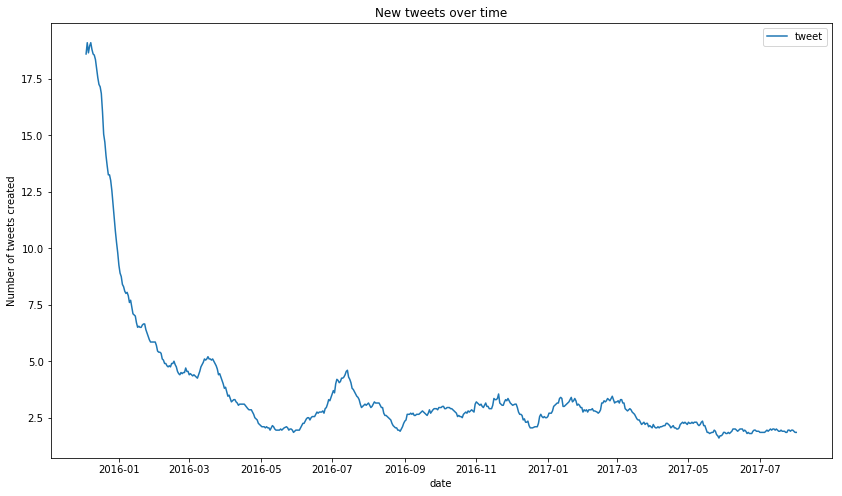

In [252]:
# Create two columns: 'tweet_date' to agregate 'datetime' and 'tweet' to sum a number of tweets for a certain date by day

df_arc['date'] = df_arc['tweet_date'].dt.date

# by week

# df_arc['tweet_date'] = df_arc['tweet_date'].dt.week

# by month

#df_arch_clean['tweet_date'] = df_arch_clean['tweet_date'].dt.month

df_arc['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date

df1 = df_arc[['date', 'tweet']].groupby(['date']).sum()

# Use moving averages to smooth the line

df1['tweet'] = df1['tweet'].rolling(window=20).mean()

# Plot

df1.plot(figsize=(14, 8), title='New tweets over time')

plt.ylabel('Number of tweets created')

plt.show()



In [253]:
df1['tweet'].describe()


count    589.000000
mean       3.678947
std        3.021644
min        1.600000
25%        2.150000
50%        2.850000
75%        3.400000
max       19.100000
Name: tweet, dtype: float64

Answer: 

There were even more than 19 tweets on average created per day at the beginning of 2016 but this frequency quickly collapsed into about 4 on average in 2016 to be even lower in 2017. There is a clear trend of decreasing popularity in terms of creation of new tweets

### Visualization

In [254]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 9]

In [268]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2356 non-null int64
tweet_date            2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
retweet_count         0 non-null float64
favorite_count        0 non-null float64
followers_count       0 non-null float64
friends_count         0 non-null float64
stage                 2356 non-null bool
dtypes: bool(5), datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 214.1+ KB


In [266]:
# Converting the tweet date to datetime

df_arc.tweet_date = pd.to_datetime(arch_cln.tweet_date)

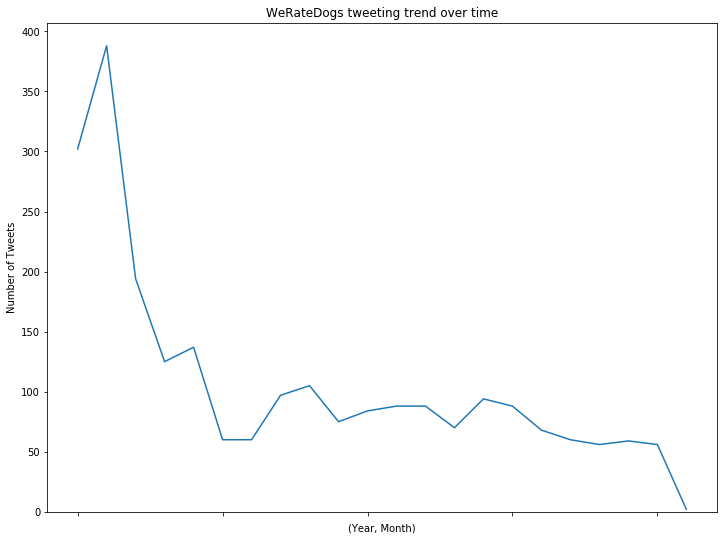

In [270]:
data = df_arc.tweet_id.groupby([df_arc["tweet_date"].dt.year, df_arc["tweet_date"].dt.month]).count()

ax = data.plot('line', title='WeRateDogs tweeting trend over time')

ax.set_xlabel("(Year, Month)")

ax.set_ylabel("Number of Tweets")
              
ax.set_ylim(0, )
              
plt.savefig('tweet_trend')
              

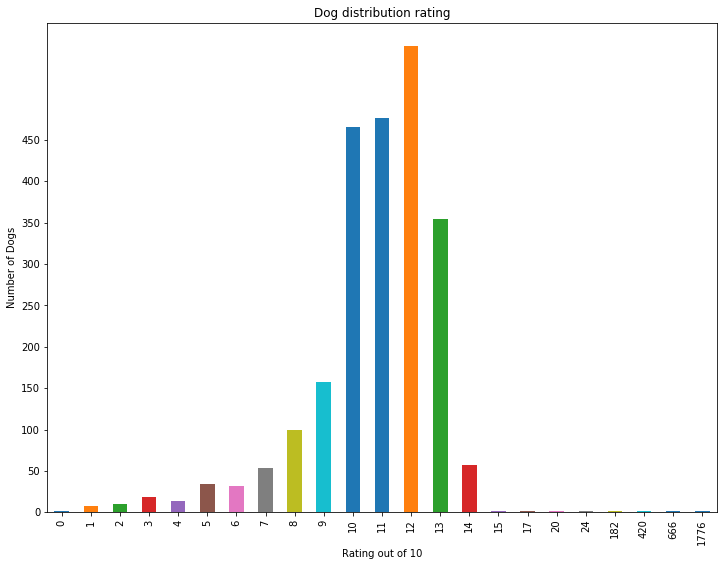

In [274]:
ax = df_arc.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog distribution rating')

ax.set_xlabel("Rating out of 10")

ax.set_ylabel("Number of Dogs")

ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])

plt.savefig('rating_distribution')

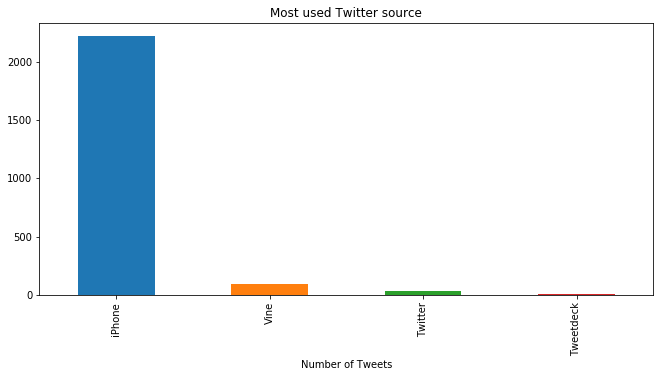

In [277]:
df_arc['source'].value_counts().plot('bar', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")

plt.savefig('twitter_source')



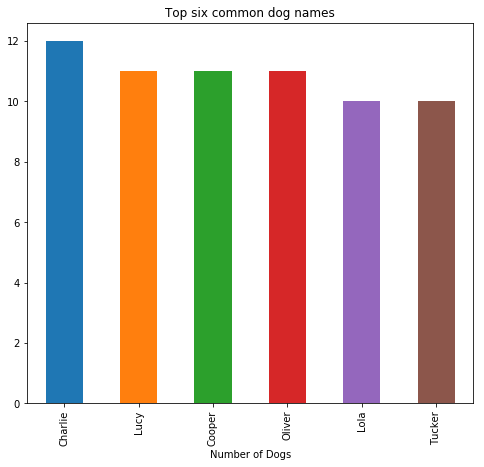

In [281]:
df_arc.name.value_counts()[1:7].plot('bar', figsize=(8,7), title='Top six common dog names').set_xlabel("Number of Dogs")

plt.savefig('dog_names')


## References

https://twitter.com/dog_rates
http://docs.tweepy.org/en/v3.6.0/api.html#api-reference
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
https://stackoverflow.com/questions/25707558/json-valueerror-expecting-property-name-line-1-column-2-char-1
https://docs.python.org/3/library/json.html#json.loads
http://www.jeannicholashould.com/tidy-data-in-python.html
https://developer.twitter.com/en/docs/tweets/post-and-engage/api-reference/get-statuses-show-id.html
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin